### Download Required Packages and Files

In [ ]:
#download the latest version of kaggle package
! pip install -q kaggle
#create a directory named kaggle on root dir
! mkdir ~/.kaggle
#download the API token
!wget https://raw.githubusercontent.com/RafiIndra/swine/main/kaggle.json
#move kaggle.json into kaggle directory
! cp kaggle.json ~/.kaggle/
#change permission of kaggle.json to readable and writeable for owner 
! chmod 600 ~/.kaggle/kaggle.json
#download the competition file
! kaggle competitions download -c dac-find-it-2023
#unzip the downloaded competition file
! unzip /content/dac-find-it-2023.zip

--2023-05-11 16:40:01--  https://raw.githubusercontent.com/RafiIndra/swine/main/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      62  --.-KB/s    in 0s      

2023-05-11 16:40:01 (2.11 MB/s) - ‘kaggle.json’ saved [62/62]

  0% 0.00/1.21M [00:00<?, ?B/s]
100% 1.21M/1.21M [00:00<00:00, 66.0MB/s]
Archive:  /content/dac-find-it-2023.zip
  inflating: submission_format.csv   
  inflating: test_set_features.csv   
  inflating: training_set_features.csv  
  inflating: training_set_labels.csv  


### Import Necessary Modules

In [ ]:
#import pandas module and name it as pd
import pandas as pd
#import numpy module and name it as np
import numpy as np
#import seaborn module and name it as sns
import seaborn as sns
#import matplotlib.pyplot module and name it as plt
import matplotlib.pyplot as plt
#import plotly.express module and name it as px
import plotly.express as px
#import tensorflow module and name it as tf
import tensorflow as tf
#import keras module
import keras
#import train_test_split package from sklearn.model_selection module
from sklearn.model_selection import train_test_split
#import NearestNeighbors package from sklearn.neighbors module
from sklearn.neighbors import NearestNeighbors
#import LogisticRegression package from sklearn.linear_model module
from sklearn.linear_model import LogisticRegression
#import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay package from sklearn.metric module
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

### Read CSV Files

In [ ]:
# read training_set_features.csv and store it as variable x
x = pd.read_csv('training_set_features.csv')

# read training_set_labels.csv and store it as variable y
y = pd.read_csv('training_set_labels.csv')

# read test_set_features.csv and store it as variable test
test = pd.read_csv('test_set_features.csv')

# join x and y on column ['respondent_id']
df_join = x.set_index('respondent_id').join(y.set_index('respondent_id'))

### Data Quality (missing, duplicate, invalid)

In [ ]:
#check the whole dataset for missing data 
df_join.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

There are a considerable amount of missing values, therefore, handling these values are a big part of this project

In [ ]:
#check the percentage of missing data for each columns 
df_join.isna().sum()/len(df_join) * 100

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

Columns with no null values 
- age_group
- race 
- sex 
- hhs_geo_region
- census_msa
- h1n1_vaccine 
- seasonal_vaccine 

Columns with low null values 
- h1n1_concern                    
- h1n1_knowledge                  
- behavioral_antiviral_meds       
- behavioral_avoidance            
- behavioral_face_mask            
- behavioral_wash_hands           
- behavioral_large_gatherings     
- behavioral_outside_home         
- behavioral_touch_face           
- doctor_recc_h1n1                
- doctor_recc_seasonal            
- chronic_med_condition           
- child_under_6_months            
- health_worker                   
- opinion_h1n1_vacc_effective     
- opinion_h1n1_risk               
- opinion_h1n1_sick_from_vacc     
- opinion_seas_vacc_effective     
- opinion_seas_risk               
- opinion_seas_sick_from_vacc     
- age_group                       
- education                       
- race                            
- sex                             
- income_poverty                 
- marital_status                 
- rent_or_own                    
- employment_status              


Columns with high null values (>45%)
- health_insurance 
- employment_industry 
- employment_occupation

In [ ]:
#total amount of rows and columns 
df_join.shape

(26707, 37)

In [ ]:
#check duplicate 
df_join[df_join.duplicated()]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,


Great, no duplicated row!

In [ ]:
#check data type for each columns
df_join.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

Some of the columns needs to be converted into float dtype

### VISUALIZATION

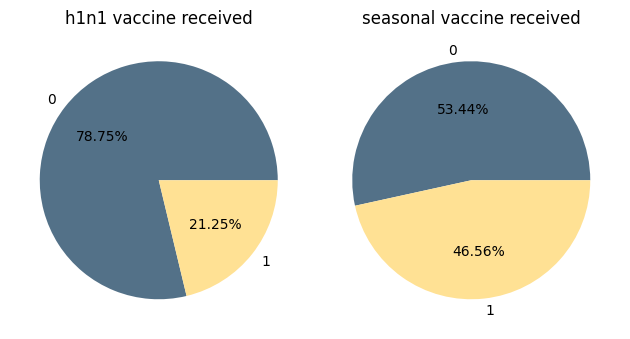

In [ ]:
#create a figure and axes object for 2 subplots
fig, ax = plt.subplots(1,2)
#create a pie chart for axis 0
ax[0].pie(
    #specify to plot data of column ['h1n1_vaccine'] of dataframe y
    y['h1n1_vaccine'].value_counts(),
    #specify the labels of data using unique values of the column
    labels=y['h1n1_vaccine'].unique(),
    #specify to display the percentage up to 2 decimal points
    autopct='%.2f%%', 
    #specify the color of the pie chart
    colors=['#537188', '#FFE194'])
#set the title of the first pie chart
ax[0].set_title('h1n1 vaccine received')
#create a pie chart for axis 1
ax[1].pie(
    #specify to plot data of column ['seasonal_vaccine'] of dataframe y
    y['seasonal_vaccine'].value_counts(),
    #specify the labels of data using unique values of ['seasonal_vaccine'] column
    labels=y['seasonal_vaccine'].unique(),
    #specify to display the percentage up to 2 decimal points
    autopct='%.2f%%', 
    #specify the color of the pie chart 
    colors=['#537188', '#FFE194'])
#set the title of the second pie chart
ax[1].set_title('seasonal vaccine received')
#automatically adjust the spacing between the 2 charts 
plt.tight_layout()
#show the charts
plt.show()


The graph above shows that the percentage of the respondent that have taken the h1n1 vaccine is reasonably low, while the percentage of respondents that have taken the seasonal vaccine is fairly balanced.

Next, let's take a look at the vaccination rate of each column. Next several cells are in preparation for this step.

In [ ]:
#define function to plot vaccination rate of a column values
#as a horizontal stacked bar chart
def vaccination_rate_plot(col, target, data, ax=None):
    #assign variable 'counts'
    counts = (
        #get values of column ['target'] and ['col'] from dataframe 'data'
        data[[target, col]]
        #count the number of each values on each column and store it on a series object
        .groupby([target, col]).size()
        #unstack the series into a dataframe with unique values of ['target'] as column,
        #and unique values of ['col'] as index
        .unstack(target))
    #sum the columns, store the results in variable group_counts
    group_counts = counts.sum(axis='columns')
    #divide 'counts' by group counts to calculate the probability of each values occuring,
    #and store it in variable props
    props = counts.div(group_counts, axis='index')
    #plot ''props' as a horizontal stacked bar chart
    props.plot(kind="barh", stacked=True, ax=ax, color=['#537188', '#FFE194'])
    #order the bars by values of 'col'
    ax.invert_yaxis()
    #remove legend from plot
    ax.legend().remove()

#define function to use vaccination_rate_plot() with multiple columns
def corr_f_label(cols_to_plot): 
    #create a figure and axes object for subplots
    fig, ax = plt.subplots(
        #specify size of the first and second dimension
        len(cols_to_plot), 2,
        #specify the size for each subplot
        figsize=(10,len(cols_to_plot)*5))
    
    #handling scenario of 1 column to plot, meaning 2 subplots to make    
    if (len(cols_to_plot) == 1):
        #call the vaccination_rate_plot() to plot the first sublplot
        vaccination_rate_plot(
            #specify the column to plot
            cols_to_plot[0],
            #specify to use label 'h1n1_vaccine' for the first subplot
            'h1n1_vaccine',
            #specify the dataframe of the column
            df_join,
            #specify the axis of the first subplot
            ax=ax[0])
        
        #call the vaccination_rate_plot() to plot the first sublplot
        vaccination_rate_plot(
            #specify the column to plot    
            cols_to_plot[0],
            #specify to use label 'seasonal_vaccine' for the second subplot
            'seasonal_vaccine',
            #specify the dataframe of the column
            df_join,
            #specify the axis of the second subplot
            ax=ax[1])

        #add legend to first subplot    
        ax[0].legend(
            #specify legend location
            loc='lower center',
            #specify the position of legend relative to the subplot
            bbox_to_anchor=(0.5, 1.05),
            #set title of the legend to 'h1n1_vaccine'
            title='h1n1_vaccine')

        #add legend to the second subplot    
        ax[1].legend(
            #specify legend location
            loc='lower center',
            #specify legend position relative to the subplot
            bbox_to_anchor=(0.5, 1.05),
            #set legend title to 'seasonal_vaccine'
            title='seasonal_vaccine')
    
    #handle scenario of >1 columns to plot, meaning >2 subplots to make
    else:
        #loop through columns to plot while indexing the columns 
        for idx, col in enumerate(cols_to_plot):
            #call the vaccination_rate_plot() to plot the first sublplot of the row
            vaccination_rate_plot(
                #specify column to plot
                col,
                #specify to use label['h1n1_vaccine'] for the second subplot of the row
                'h1n1_vaccine',
                #specify dataframe of col
                df_join,
                #specify axis of the first subplot of the row
                ax=ax[idx, 0])

            #call the vaccination_rate_plot() to plot the second sublplot of the row
            vaccination_rate_plot(
                #specify column to plot
                col,
                #specify to use label['seasonal_vaccine'] for the second subplot of the row
                'seasonal_vaccine',
                #specify dataframe of col
                df_join,
                #specify axis of the first subplot of the row
                ax=ax[idx, 1])
    
        #add legend on axis 0,0
        ax[0, 0].legend(
            #specify legend location
            loc='lower center',
            #specify legend position relative to the subplot
            bbox_to_anchor=(0.5, 1.05),
            #set legend title as 'h1n1_vaccine'
            title='h1n1_vaccine')
        #add legend on axis 0,1
        ax[0, 1].legend(
            #specify legend location
            loc='lower center',
            #specify legend position relative to the subplot
            bbox_to_anchor=(0.5, 1.05),
            #set legend title as 'seasonal_vaccine'
            title='seasonal_vaccine')
    #adjust the margin between subplots
    fig.subplots_adjust(left=0.2, right=0.3, bottom=0.2, top=0.8)
    #adjust subplots sizes according to the margin
    fig.tight_layout()

Now, divide the columns into sub-categories to make it easier to see patterns on the visualizations.

In [ ]:
# make a list named 'biner' tp store names of column that contains binary values
biner = [
    #add 'behavioral_antiviral_meds' into the list 
    'behavioral_antiviral_meds',
    #add 'behavioral_avoidance' into the list
    'behavioral_avoidance',
    #add 'behavioral_face_mask' into the list
    'behavioral_face_mask',
    #add 'behavioral_wash_hands' into the list
    'behavioral_wash_hands',
    #add 'behavioral_large_gatherings' into the list
    'behavioral_large_gatherings',
    #add 'behavioral_outside_home' into the list
    'behavioral_outside_home',
    #add 'behavioral_touch_face' into the list
    'behavioral_touch_face',
    #add 'doctor_recc_h1n1' into the list
    'doctor_recc_h1n1',
    #add 'doctor_recc_seasonal' into the list
    'doctor_recc_seasonal',
    #add 'chroni_med_condition' into the list
    'chronic_med_condition',
    #add 'child_under_6_months' into the list
    'child_under_6_months',
    #add 'health_worker' into the list
    'health_worker',
    #add 'health_insurance' into the list
    'health_insurance',
    #add 'household' into the list
    'household_adults',
    #add 'household_children' into the list
    'household_children']

# make a list named 'disk' contain column names that contain discrete value
dsk = [
    #add 'h1n1_concern' into the list
    'h1n1_concern',
    #add 'h1n1_knowlegde' into the list
    'h1n1_knowledge', 
    #add 'opinion_h1n1_vacc_effective' into the list
    'opinion_h1n1_vacc_effective',
    #add 'opinion_h1n1_risk' into the list
    'opinion_h1n1_risk',
    #add 'opinion_h1n1_sick_from_vacc' into the list
    'opinion_h1n1_sick_from_vacc',
    #add 'opinion_seas_vacc_effective' into the list
    'opinion_seas_vacc_effective',
    #add 'opinion_seas_risk' into the list
    'opinion_seas_risk',
    #add 'opinion_seas_sick_from_vacc' into the list
    'opinion_seas_sick_from_vacc']

# make a list named 'cat' contain column names that contain category value
cat = [
    #add 'age_group' into the list
    'age_group','education',
    #add 'race' into the list
    'race',
    #add 'sex' into the list
    'sex',
    #add 'income_poverty' into the list
    'income_poverty',
    #add 'marital_status' into the list
    'marital_status',
    #add 'rent_or_own' into the list
    'rent_or_own',
    #add 'employment_status' into the list
    'employment_status',
    #add 'hhs_heo_region' into the list
    'hhs_geo_region',
    #add 'census_msa' into the list
    'census_msa',
    #add 'employment_industry' into the list
    'employment_industry',
    #add 'employment_occupation' into the list
    'employment_occupation']

Now we can plot the first sub-category, which is binary columns:

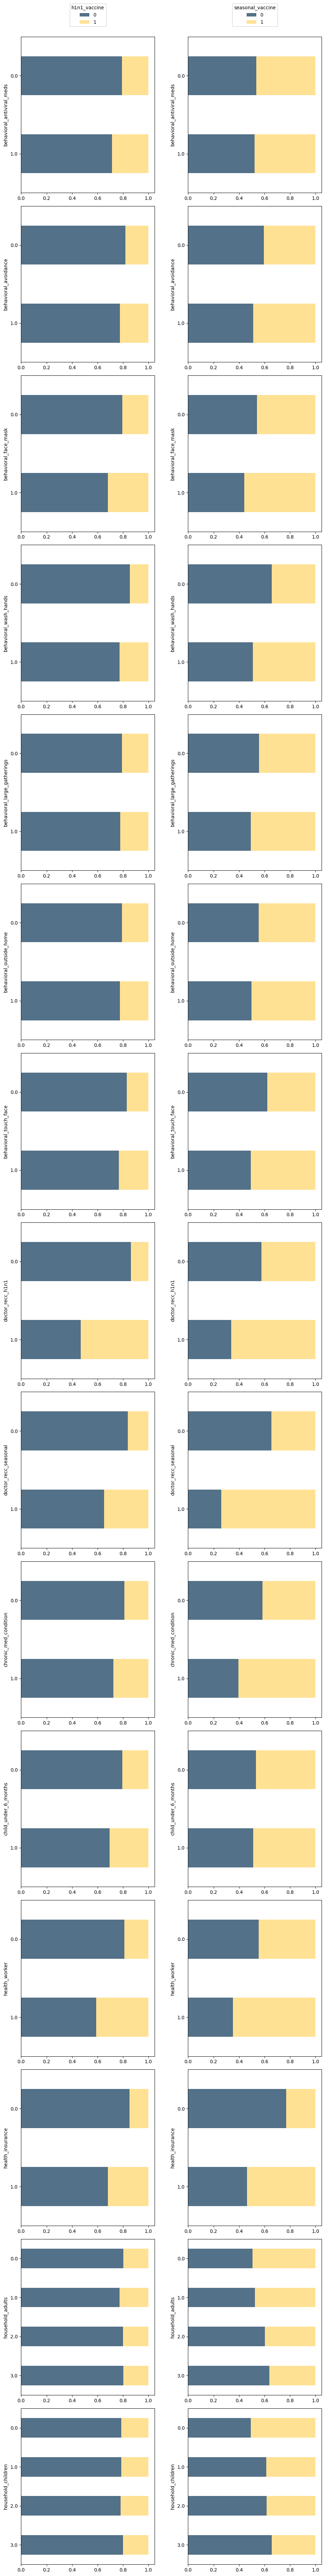

In [ ]:
#make correlation plot between columns that contained binary values and label with corr_f_label method
corr_f_label(biner)

Now plot the columns with discrete data:

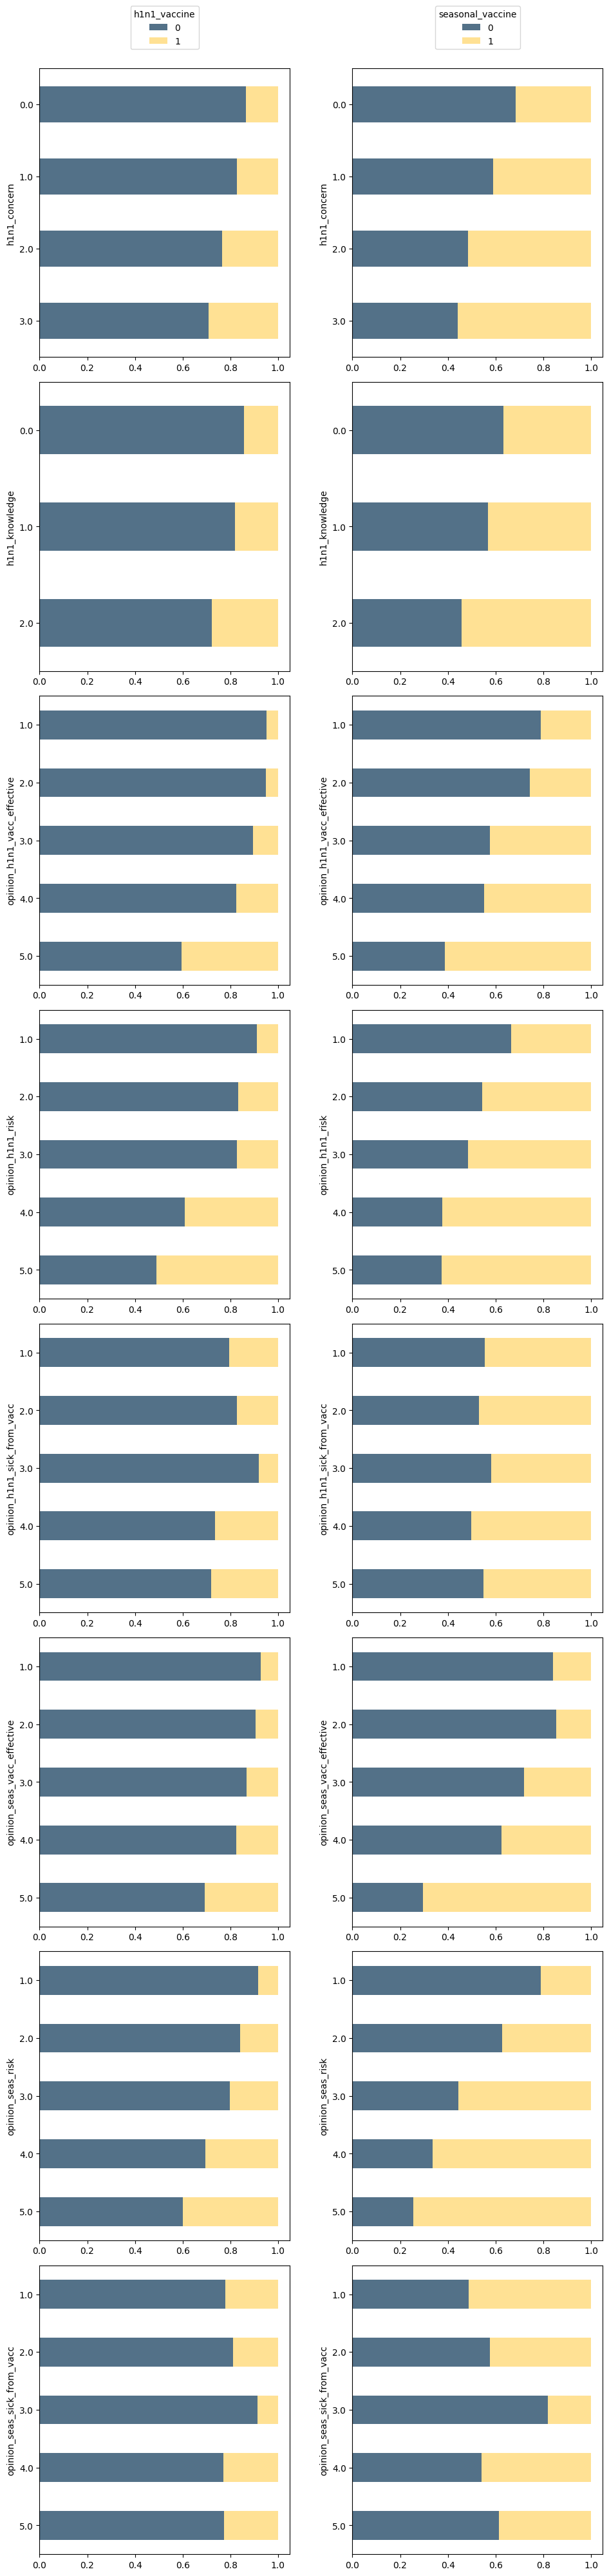

In [ ]:
#make correlation plot between columns that contained discrete values and label with corr_f_label method
corr_f_label(dsk)

lastly, plot the columns with categorical data:

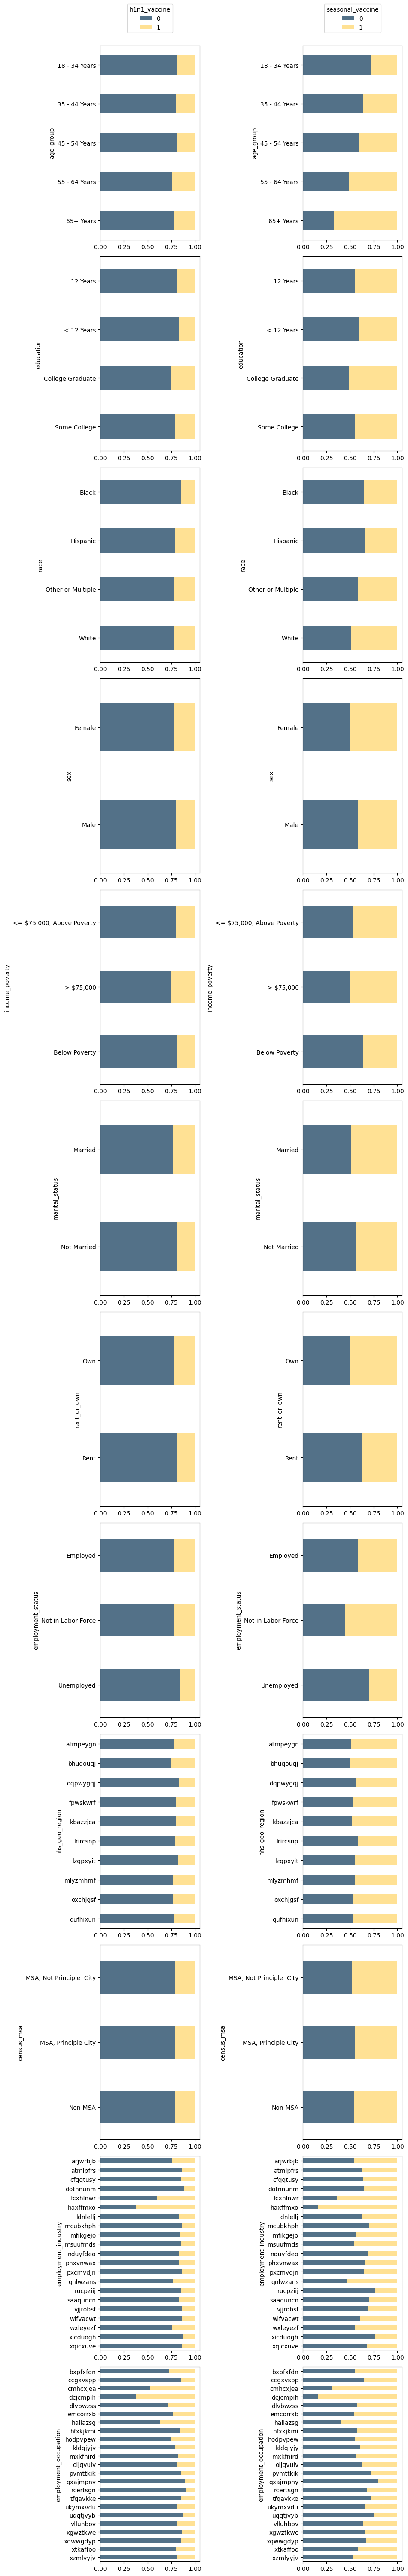

In [ ]:
#make correlation plot between columns that contained categorical values and label with corr_f_label method
corr_f_label(cat)

### Feature Engineering

Notice that for opinion-based columns, the values are encoded as integer from 1 to 5. Value of 1 representing a strong negative opinion, while value of 5 representing a strong positive opinion. From this information, reencoding the negative opinion as negative integer, and positive opinion as positive integer may provide more information for the model. Moreover, we then can sum all the opinion-based columns to enhance the information even more.

Similarly, the behavioral columns values are also encoded as binary, with 1 representing that respondent have adapted the behavior, and value 0 for the opposite. These behavioral columns may also be summed to enhance the information from every column. Taken from the visualization above, some behavioral columns impact the vaccination rate of 1 vaccine, while having no impact for the other vaccine. Adapting to this, lets group the behavioral columns into 2 columns, where each column are formed from the summation of behavioral columns that have an impact on the respective vaccine.

The next several cells are in preparation for this step.

In [ ]:
def sum_opinion(df, cols):
    #loop through the columns
    for col in cols:
        #re-encode positive and negative opinion accordingly
        df = df.replace({col : { 1:-3, 2:-2, 3:-1, 4:2, 5:3}})
    #sum the columns and assign it into a new column
    df['opinion_sum'] = df[cols].sum(axis=1)
    #return the processed dataset
    return df

def sum_behavior(df, cols, i):
    # sum the columns and assign it into a new column
    df[i] = df[cols].sum(axis=1)
    # return the processed dataset
    return df

<Axes: xlabel='opinion_sum', ylabel='Count'>

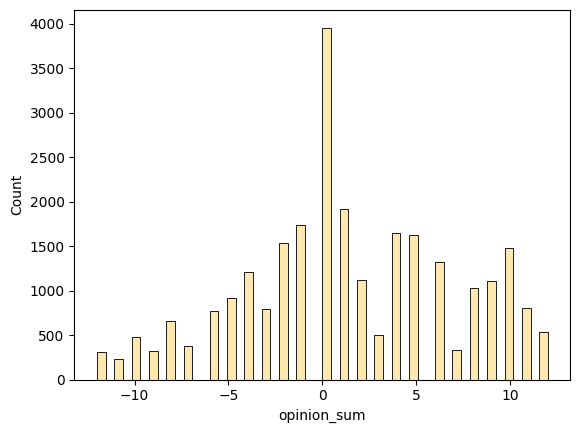

In [ ]:
cols = ['opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_h1n1_vacc_effective']
df_join = sum_opinion(df_join, cols)
sns.histplot(df_join['opinion_sum'], color = '#FFE194')

Let's plot the vaccination rate of our new opinion_sum column:

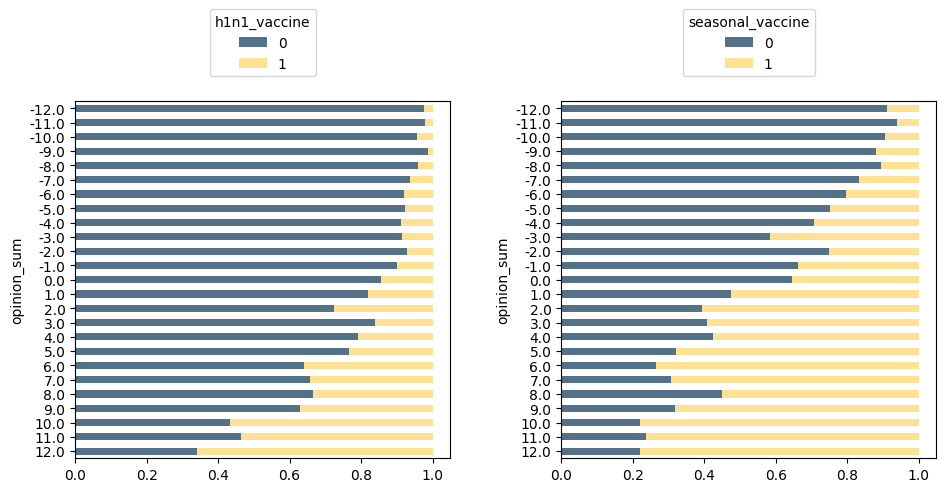

In [ ]:
corr_f_label(['opinion_sum'])

Great! The result of the summation are showing a clear positive correlation to vaccination rate!

now lets try to group behavioral columns into 2 group and sum them, as mentioned before:

In [ ]:
#specify behavior columns that have impact to h1n1 vaccination rate
cols_bhv_h1n1 = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands']
#sum the specified columns
df_join = sum_behavior(df_join, cols_bhv_h1n1, 'bhv_h1n1')
#specify behavior columns that have impact to seasonal vaccination rate
cols_bhv_seas = ['behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands']
#sum the specified columns
df_join = sum_behavior(df_join, cols_bhv_seas, 'bhv_seas')
#specify all of the behavioral columns
bhv = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 
        'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face']

Take a look at the distribution of our 2 new columns:



<Axes: xlabel='bhv_h1n1', ylabel='Count'>

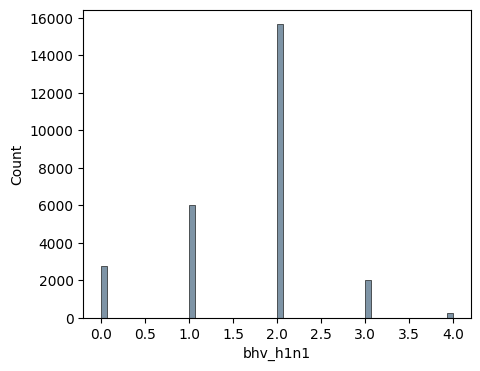

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(df_join['bhv_h1n1'], color = '#537188')

<Axes: xlabel='bhv_seas', ylabel='Count'>

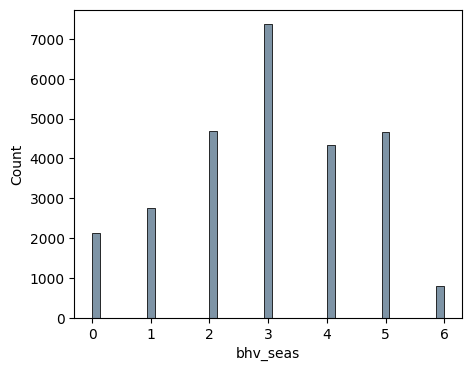

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(df_join['bhv_seas'], color = '#537188')

Let's plot the vaccination rate of our 2 new columns:

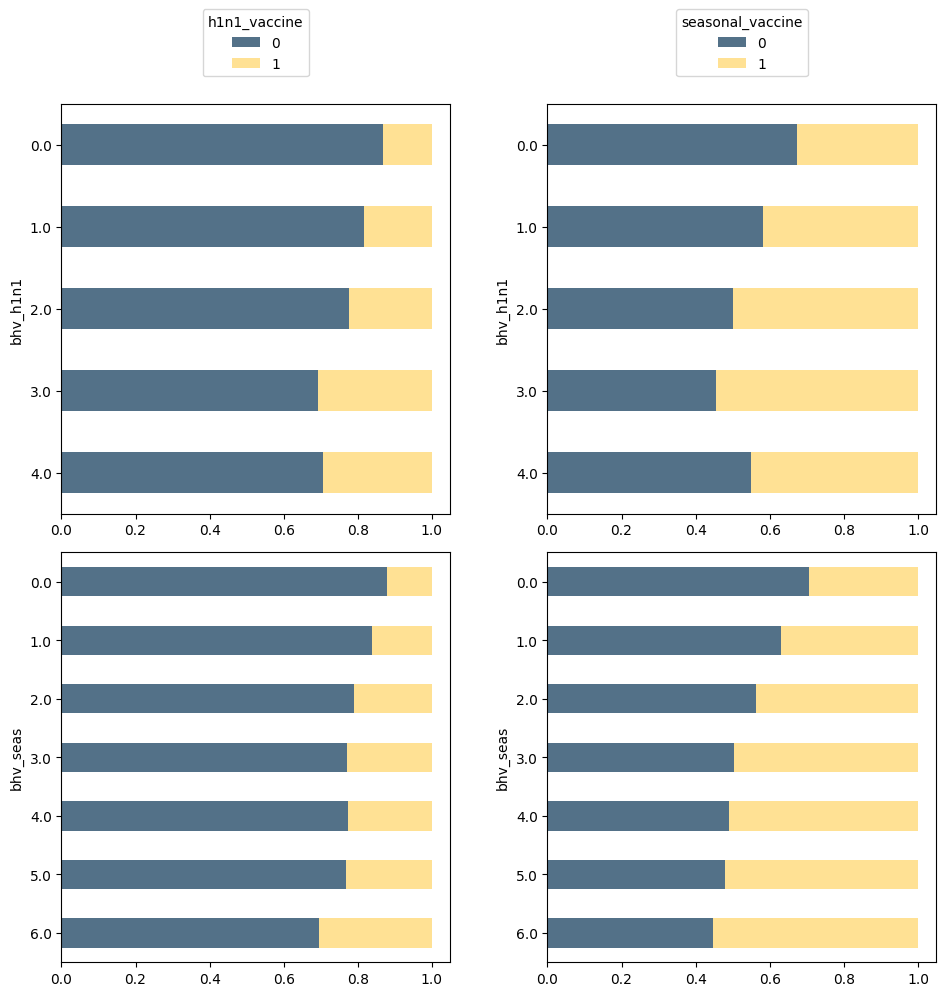

In [ ]:
corr_f_label(['bhv_h1n1', 'bhv_seas'])

Great! both columns also show a positive correlation to the vaccination rate.

Lastly, let's take a look at the distribution of all the columns, in case of any invalid or unexpected value:

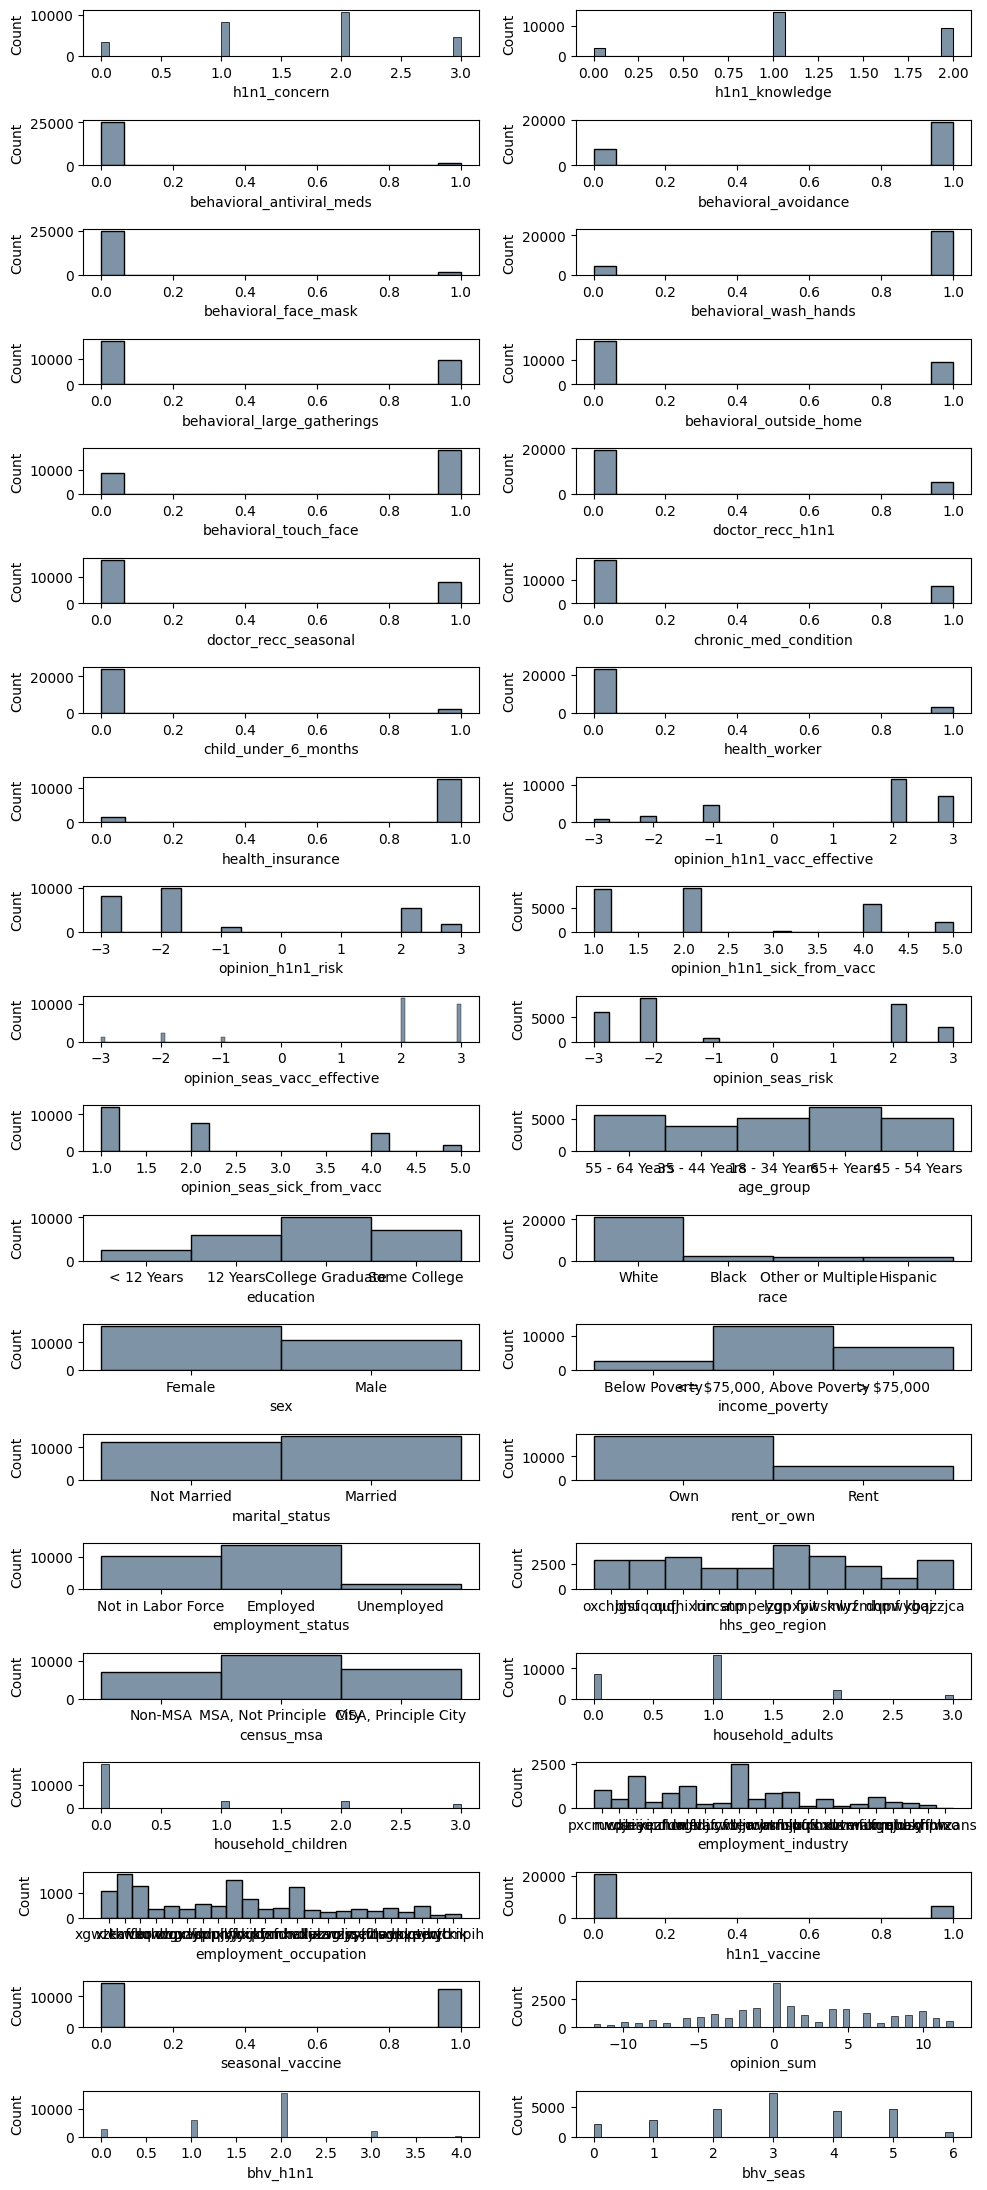

In [ ]:
#store all the columns
colss = df_join.columns
#create a figure and axes for 40 subplots
fig, axs = plt.subplots(ncols = 2, nrows=20, figsize=(10, 22))
#loop through the columns while coutning the index
for i, column in enumerate(colss):
    #plot a histogram for the column
    sns.histplot(df_join[column],ax=axs[i//2,i%2], color='#537188')

#outputs the plots
fig.tight_layout()

The conclusion of our EDA journey are as follows: 
- drop census_msa, opinion_h1n1_sick_from_vacc, opinion_seas_sick_from_vacc, hhs_geo_region because they have little to no correlation to label 
- drop health_insurance, employment_industry, employment_occupation because they contains too many null values 
- reencode and sum the opinion based columns
- sum the behavioral columns (separate behavioral for h1n1 and seasonal)

Below are the data dictionary of this project
  

### DATA DICTIONARY
<table>
  <tr>
    <th>no</th>
    <th>Column</th>
    <th>Data Types</th>
    <th>Types of Value</th>
    <th>Decision</th>
  </tr>
  <tr>
    <td>1</td>
    <td>h1n1_concern</td>
    <td>float64</td>
    <td>discrete</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>2</td>
    <td>h1n1_knowledge</td>
    <td>float64</td>
    <td>discrete</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>3</td>
    <td>behavioral_antiviral_meds</td>
    <td>float64</td>
    <td>binary</td>
    <td>Merge to behavioral sum</td>
  </tr>
  <tr>
    <td>4</td>
    <td>behavioral_avoidance</td>
    <td>float64</td>
    <td>binary</td>
    <td>Merge to behavioral sum</td>
  </tr>
  <tr>
    <td>5</td>
    <td>behavioral_face_mask</td>
    <td>float64</td>
    <td>binary</td>
    <td>Merge to behavioral sum</td>
  </tr>
  <tr>
    <td>6</td>
    <td>behavioral_wash_hands</td>
    <td>float64</td>
    <td>categorical</td>
    <td>Merge to behavioral sum</td>
  </tr>
  <tr>
    <td>7</td>
    <td>behavioral_large_gatherings</td>
    <td>float64</td>
    <td>binary</td>
    <td>Merge to behavioral sum</td>
  </tr>
  <tr>
    <td>8</td>
    <td>behavioral_outside_home</td>
    <td>float64</td>
    <td>binary</td>
    <td>Merge to behavioral sum</td>
  </tr>
  <tr>
    <td>9</td>
    <td>behavioral_touch_face</td>
    <td>float64</td>
    <td>binary</td>
    <td>Merge to behavioral sum</td>
  </tr>
  <tr>
    <td>10</td>
    <td>doctor_recc_h1n1</td>
    <td>float64</td>
    <td>binary</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>11</td>
    <td>doctor_recc_seasonal</td>
    <td>float64</td>
    <td>binary</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>12</td>
    <td>chronic_med_condition</td>
    <td>float64</td>
    <td>binary</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>13</td>
    <td>child_under_6_month</td>
    <td>float64</td>
    <td>binary</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>14</td>
    <td>health_worker</td>
    <td>float64</td>
    <td>binary</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>15</td>
    <td>health_insurance</td>
    <td>float64</td>
    <td>binary</td>
    <td>Drop</td>
  </tr>
  <tr>
    <td>16</td>
    <td>opinion_h1n1_vacc_effective</td>
    <td>float64</td>
    <td>discrete</td>
    <td>Merge to opinion sum</td>
  </tr>
  <tr>
    <td>17</td>
    <td>opinion_h1n1_risk</td>
    <td>float64</td>
    <td>discrete</td>
    <td>Merge to opinion sum</td>
  </tr>
  <tr>
    <td>18</td>
    <td>opinion_h1n1_sick_from_vacc</td>
    <td>float64</td>
    <td>discrete</td>
    <td>Drop</td>
  </tr>
  <tr>
    <td>19</td>
    <td>opinion_seas_vacc_effective</td>
    <td>float64</td>
    <td>discrete</td>
    <td>Merge to opinion sum</td>
  </tr>
  <tr>
    <td>20</td>
    <td>opinion_seas_risk</td>
    <td>float64</td>
    <td>discrete</td>
    <td>Merge to opinion sum</td>
  </tr>
  <tr>
    <td>21</td>
    <td>opinion_seas_sick_from_vacc</td>
    <td>float64</td>
    <td>discrete</td>
    <td>Drop</td>
  </tr>
  <tr>
    <td>22</td>
    <td>age_group</td>
    <td>object</td>
    <td>categorical</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>23</td>
    <td>education</td>
    <td>object</td>
    <td>categorical</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>24</td>
    <td>race</td>
    <td>object</td>
    <td>categorical</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>25</td>
    <td>sex</td>
    <td>object</td>
    <td>binary</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>26</td>
    <td>income_poverty</td>
    <td>object</td>
    <td>categorical</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>27</td>
    <td>marital_status</td>
    <td>object</td>
    <td>binary</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>28</td>
    <td>rent_or_own</td>
    <td>object</td>
    <td>binary</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>29</td>
    <td>remployment_status</td>
    <td>object</td>
    <td>categorical</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>30</td>
    <td>hhs_geo_region</td>
    <td>object</td>
    <td>categorical</td>
    <td>Drop</td>
  </tr>
  <tr>
    <td>31</td>
    <td>rcensus_msa</td>
    <td>object</td>
    <td>categorical</td>
    <td>Drop</td>
  </tr>
  <tr>
    <td>32</td>
    <td>household_adults</td>
    <td>object</td>
    <td>categorical</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>33</td>
    <td>household_childern</td>
    <td>object</td>
    <td>categorical</td>
    <td>Keep</td>
  </tr>
  <tr>
    <td>34</td>
    <td>employment_industry</td>
    <td>object</td>
    <td>categorical</td>
    <td>Drop</td>
  </tr>
  <tr>
    <td>35</td>
    <td>employment_occupation</td>
    <td>object</td>
    <td>categorical</td>
    <td>Drop</td>
  </tr>
</table>

### DATA CLEANING AND PREPROCESSING

<h4> Handling Null Values <h4>

For columns with binary values, one way to handle missing values is to predict the values using Logistic Regression. Next several cells are in preparation for this. First, let's drop ['health_insurance'] column as it contains too many null values:

In [ ]:
#drop column health insuracne from df_join dataframe
df_join = df_join.drop(['health_insurance'], axis=1)
#drop column health insuracne from test dataframe
test = test.drop(['health_insurance'], axis=1)

This next cell is to predict and fill missing values on columns with binary values, using values from the rest of the numerical columns for model input.

In [ ]:
#specify columns with binary values
df_binary = df_join.iloc[:,2:14]
#instantiate a Logistic Regression model
model = LogisticRegression()
#loop through the binary columns
for col in df_binary.columns:
    #copy the numerical columns into a new dataframe for model training
    train = df_join.iloc[:,:20].copy()
    #drop null values from train data
    train = train.dropna()
    #pop the column that we want to predict and use it as train label
    label = train.pop(col)
    #split data into training and testing data with 7:3 ratio
    x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.3, shuffle=True, random_state=42)
    #fit model with train data
    model.fit(x_train, y_train)
    #predict the test data using trained model, store the result as m_evaluate variable
    m_evaluate = model.predict(x_test)
    #calculate correct prediction percentage
    akurasi = (m_evaluate==y_test).sum()/x_test.shape[0]
    #output the accuracy
    print(f'akurasi kolom {col}= {akurasi}')
    #loop through the values of the column
    for i, x in enumerate(test[col]):
        #handle scenario if row is null
        if np.isnan(x):
            #copy numerical columns values on this row for model input
            df_copy = test.iloc[:,1:21].copy()
            #remove column to predict from input data
            df_copy.pop(col)
            #predict null values using input data, temporarily fill other missing with 0 or 1
            test.loc[i, col] = model.predict(df_copy.loc[[i]].fillna(np.random.randint(2)))

#output null values on dataframe
test.isna().sum()

akurasi kolom behavioral_antiviral_meds= 0.9505725467459052
akurasi kolom behavioral_avoidance= 0.7806928540368169
akurasi kolom behavioral_face_mask= 0.9336135671836499
akurasi kolom behavioral_wash_hands= 0.8495434120887085
akurasi kolom behavioral_large_gatherings= 0.8044644151326279
akurasi kolom behavioral_outside_home= 0.8083780258008407
akurasi kolom behavioral_touch_face= 0.7677924336860414
akurasi kolom doctor_recc_h1n1= 0.8486737208291056
akurasi kolom doctor_recc_seasonal= 0.8189592694593419
akurasi kolom chronic_med_condition= 0.7224235396434265
akurasi kolom child_under_6_months= 0.9134657196695173
akurasi kolom health_worker= 0.8849108566458908


respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
marital_status                  1442
r

The accuracy of the prediction varies, but are good enough to fill the missing values.

Next, let's define some useful function to clean and preprocess our data:

In [ ]:
#defining functions

#function to sum all the behavioral columns
def sum_behavior(df, cols, i):
    # sum the columns and assign it into a new column
    df[i] = df[cols].sum(axis=1)
    # return the processed dataset
    return df

# funtion sum the opinion based columns
def sum_opinion(df):
    #drop ['opinion_h1n1_sick_from_vacc', 'opinion_seas_sick_from_vacc'] column, as they dont carry correlation to vaccination rate
    df = df.drop(['opinion_h1n1_sick_from_vacc', 'opinion_seas_sick_from_vacc'], axis=1)
    #store the opinion based columns
    cols = ['opinion_h1n1_risk', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_h1n1_vacc_effective']
    #sum the columns and assign it into a new column
    df['opinion_sum'] = df[cols].sum(axis=1)
    #drop the original columns
    df = df.drop(cols, axis=1)
    #return the processed dataset
    return df

#fucntion to clean dataset
def clean(df):
    df = df.drop(['employment_industry', 'employment_occupation', 'hhs_geo_region', 'census_msa'], axis = 1)
    #encode race column into numeric, based on their likelihood to take vaccines
    df = df.replace({'race' : {'White':4, 'Other or Multiple':3, 'Hispanic':1, 'Black' : 2}})
    #encode education column into numeric, based on their likelihood to take vaccines
    df = df.replace({'education' : { '< 12 Years' : 1, '12 Years' : 2, 'College Graduate' : 4, 'Some College' : 3}})
    #encode age_group column into numeric, based on their likelihood to take vaccines
    df = df.replace({'age_group' : { '18 - 34 Years' : 1, '35 - 44 Years' : 2, '45 - 54 Years' : 3, '65+ Years' : 4, '55 - 64 Years' : 5}})
    #encode marital_status column into binary
    df = df.replace({'marital_status' : { 'Not Married' : 0, 'Married' : 1}})
    #encode income_poverty column into numeric, based on their likelihood to take vaccines
    df = df.replace({'income_poverty' : {'Below Poverty':1, '<= $75,000, Above Poverty':2, '> $75,000' : 3}})
    #encode rent_or_own column into binary
    df = df.replace({'rent_or_own' : { 'Own' : 0, 'Rent' : 1}})
    #encode employment_status column into numeric, based on their likelihood to take vaccines
    df = df.replace({'employment_status' : { 'Not in Labor Force':3, 'Employed' : 2, 'Unemployed' : 1}})
    #encode age_group column into binary
    df = df.replace({'sex' : { 'Male' : 0, 'Female' : 1}})
    #cast dataset into float
    df = df.astype(float)
    #return processed dataset
    return df

we have done the summation of behavioral and opinion based columns on the EDA phase, but it was done using data that has not been clean, so let's drop those columns and redo it with clean data:

In [ ]:
#drop ['bhv_h1n1', 'bhv_seas', 'opinion_sum'] column from df_join
df_join = df_join.drop(['bhv_h1n1', 'bhv_seas', 'opinion_sum'], axis=1)

Let's get into the data cleaning!

In [ ]:
#define behavioral columns that have impact to h1n1 vaccination rate
cols_bhv_h1n1 = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands']
#define behavioral columns that have impact to seasonal vaccination rate
cols_bhv_seas = ['behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands']
#define all of the behavioral columns
bhv = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 
        'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face']
#sum behavioral column that have an impact on h1n1_vaccine label
df = sum_behavior(df_join, cols_bhv_h1n1, 'bhv_h1n1')
#sum behavioral column that have an impact on seasonal_vaccine label
df = sum_behavior(df, cols_bhv_seas, 'bhv_seas')
#drop original behavioral columns
df = df.drop(bhv, axis=1)
#process train dataset with sum_opinion() method
df = sum_opinion(df)
#drop null values from train dataset
df = df.dropna()
#process train dataset with clean() method
df = clean(df)

#remove column repondent_id from test dataset and store it in respondent_id variable
respondent_id = [test.pop('respondent_id')]
#sum behavioral column that have an impact on h1n1_vaccine label
test = sum_behavior(test, cols_bhv_h1n1, 'cols_bhv_h1n1')
#sum behavioral column that have an impact on seasonal_vaccine label
test = sum_behavior(test, cols_bhv_seas, 'cols_bhv_seas')
#drop original behavioral columns
test =test.drop(bhv, axis=1)
#process test dataset with sum_opinion() method
test = sum_opinion(test)
#fill null values in test dataset by using the previous valid value
test = test.fillna(method='ffill')
#process test dataset with clean() method
test = clean(test)

#create training label dataset by combining h1n1_vaccine and seasonal vaccine column from train dataset
label = df[['h1n1_vaccine']].join(df[['seasonal_vaccine']])
#drop the h1n1_vaccine and seasonal vaccine column from train dataset
df = df.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
#replace -1 values from training label dataset with 0s
label = label.replace(-1, 0)

Now take a look at the cleaning and preprocessing results:

In [ ]:
#peek at the processed train dataset
df

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,bhv_h1n1,bhv_seas,opinion_sum
respondent_id,,,,,,,,,,,,,,,,,,,,
1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,4.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,2.0,4.0,5.0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,4.0,-6.0
5,3.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,2.0,4.0,0.0,2.0,1.0,0.0,2.0,2.0,3.0,2.0,3.0,6.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,4.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-1.0
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,3.0,4.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26694,2.0,2.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0,4.0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0
26698,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,1.0,3.0,1.0,0.0,2.0,1.0,1.0,2.0,3.0,9.0
26699,2.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,4.0,0.0


In [ ]:
#peek at the processed training label dataset
label

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
1,0.0,1.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,1.0,1.0
...,...,...
26694,0.0,1.0
26698,0.0,1.0
26699,0.0,0.0


In [ ]:
#peek at the processed test features dataframe
test

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,cols_bhv_h1n1,cols_bhv_seas,opinion_sum
0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,1.0,3.0,0.0,1.0,2.0,1.0,0.0,2.0,4.0,12.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,0.0,1.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,10.0
2,2.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,0.0,3.0,1.0,0.0,2.0,1.0,0.0,2.0,5.0,18.0
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,2.0,4.0,1.0,2.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,14.0
4,3.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,3.0,5.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,4.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,2.0,3.0,12.0
26704,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,0.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,5.0,12.0
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,1.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,14.0
26706,3.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,3.0,4.0,1.0,2.0,1.0,0.0,3.0,1.0,0.0,2.0,3.0,12.0


In [ ]:
df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
       'health_worker', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'household_adults', 'household_children', 'bhv_h1n1', 'bhv_seas',
       'opinion_sum'],
      dtype='object')

### DATAFRAME SPLITTING

Prepare the data to train and test our model:

In [ ]:
#split train features and train labels dataset into train features and labels
#and validation features and labels with 7:3 ratio 
x_train, x_test, y_train, y_test = train_test_split(df, label, test_size=.3, random_state=30)

In [ ]:
#peek at the number of columns on the final train features dataset
len(df.columns)

20

### MODEL BUILDING AND TRAINING

When using a Neural Network model, it's important to define the right architechture that fits our data. For this project, the data contains a lot of 0s, therefore using the RELU activation function might lead to several problems, such as "dying RELU", where the gradient of the function basically vanish, so we decided to use sigmoid activation function. The data of this project is also not very complex, therefore small number of hidden layers and neurons are important to avoid overfitting.

when compiling the model, there are also several parameters to specify, here, we are using 'adam' optimizers to automatically adjust the learning rate, and a binary cross entrpoy loss fucntion as we are classifying a binary label. This competition also use ROC AUC to measures performance, so that is what we used here.

Enough talking, let's get to building and training!

In [ ]:
#building a tensorflow model
model = tf.keras.Sequential([
    #add an input layer and specify the input size of 20 columns
    tf.keras.Input(shape=(20,)),
    #add a hidden layer with 32 neurons and sigmoid activation
    tf.keras.layers.Dense(32, activation='sigmoid'),
    # tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='sigmoid')])

#compile the model with selected spesification
model.compile(
    #use adam optimizers to adjusts the learning rate automatically
    optimizer='adam',
    #use binary cross entropy loss because we're predicting binary labels
    loss='binary_crossentropy',
    #use accuracy to mesure performance
    metrics=[tf.keras.metrics.AUC(curve='ROC')])

#fit the model into training data, store the process in history variable
history = model.fit(
    #specify training features
    x_train,
    #specify training labels
    y_train,
    #specify number of training epochs
    epochs=60,
    #specify how many information to output for each epoch
    verbose=2,
    #specify validation fetures and labels
    validation_data=(x_test, y_test),
    #specify number of data to feed into the model
    batch_size=64)

Epoch 1/60
121/121 - 2s - loss: 0.6053 - auc: 0.6457 - val_loss: 0.5506 - val_auc: 0.7687 - 2s/epoch - 14ms/step
Epoch 2/60
121/121 - 0s - loss: 0.5140 - auc: 0.8008 - val_loss: 0.5111 - val_auc: 0.8060 - 277ms/epoch - 2ms/step
Epoch 3/60
121/121 - 0s - loss: 0.4903 - auc: 0.8156 - val_loss: 0.4925 - val_auc: 0.8180 - 281ms/epoch - 2ms/step
Epoch 4/60
121/121 - 0s - loss: 0.4797 - auc: 0.8223 - val_loss: 0.4838 - val_auc: 0.8257 - 348ms/epoch - 3ms/step
Epoch 5/60
121/121 - 0s - loss: 0.4726 - auc: 0.8282 - val_loss: 0.4778 - val_auc: 0.8295 - 369ms/epoch - 3ms/step
Epoch 6/60
121/121 - 0s - loss: 0.4671 - auc: 0.8325 - val_loss: 0.4733 - val_auc: 0.8315 - 344ms/epoch - 3ms/step
Epoch 7/60
121/121 - 0s - loss: 0.4628 - auc: 0.8354 - val_loss: 0.4692 - val_auc: 0.8353 - 284ms/epoch - 2ms/step
Epoch 8/60
121/121 - 0s - loss: 0.4597 - auc: 0.8379 - val_loss: 0.4666 - val_auc: 0.8373 - 273ms/epoch - 2ms/step
Epoch 9/60
121/121 - 0s - loss: 0.4573 - auc: 0.8396 - val_loss: 0.4647 - val_auc:

Let's graph the accuracy and the loss to visualize the lerning process of our model:

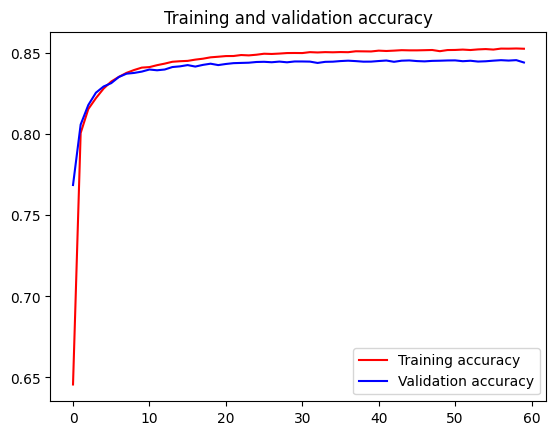

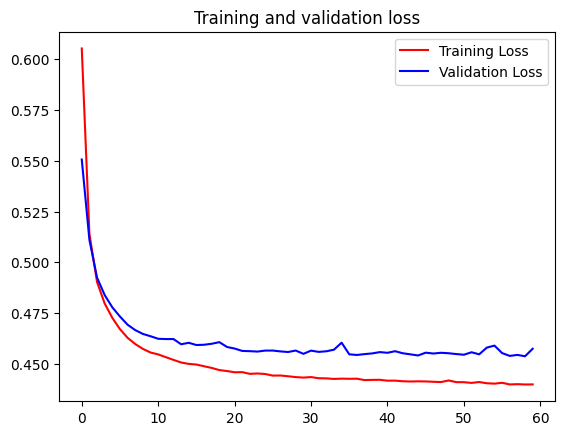

In [ ]:
acc = history.history['auc']
val_acc = history.history['val_auc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### CROSS CHECK VALIDATION

Let's test the trained model by using it to predict the test data:

In [ ]:
#predicting on validation features using the model,
#storing the result on res variable
res = model.predict(x_test)
#apply threshold of 0.5 to convert the result from float into integer
res = np.where(res >= 0.5, 1, 0)
#outputting the result
res

103/103 [==============================] - 0s 1ms/step


array([[0, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 0],
       [0, 1]])

Check the accuracy of test prediction:

In [ ]:
#counting the number of correct prediction divided by number of validation data
print((res==y_test).sum()/y_test.shape[0])

h1n1_vaccine        0.824333
seasonal_vaccine    0.759405
dtype: float64


The accuracy falls around 82-83 for h1n1_vaccine label, and 75-76% on seasonal_vaccine label

Now let's visualize the prediction results as a confusion matrix:

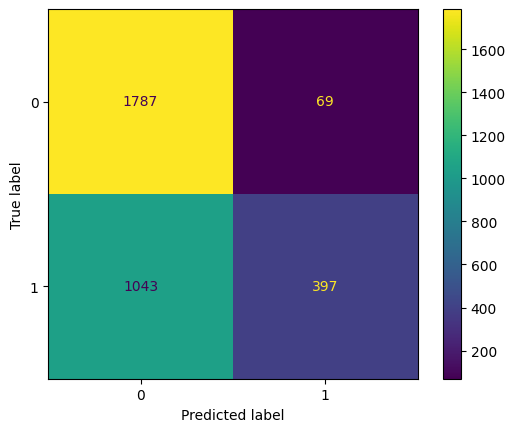

In [ ]:
#specify data to plot confusion matrix
cm = confusion_matrix(y_test.iloc[:, 1], res[:, 0])
#outputs the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

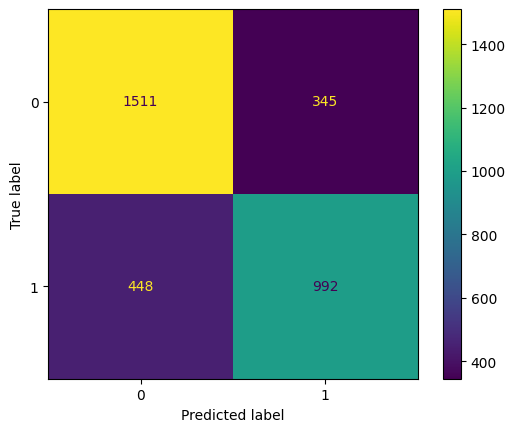

In [ ]:
#specify data to plot confusion matrix
cm = confusion_matrix(y_test.iloc[:, 1], res[:, 1])
#ouputs the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### PREDICTING TEST DATA FRAME FOR SUBMISSION

Finally, let's predict the test features for our submission!

In [ ]:
#predicting on testing features using the model,storing the result on submission variable
submission = model.predict(test)
#convert submission variable from series to dataframe
submission = pd.DataFrame(submission, columns = ['h1n1_vaccine','seasonal_vaccine'])
#assigning respondent_id variable into new column on submission dataframe
submission['respondent_id'] = respondent_id[0][:]
#create a list of reordered submission column name
cols = [submission.columns[2], submission.columns[0], submission.columns[1]]
#reorder the columns on submission dataframe
submission = submission[cols]
#outputs the submission dataframe
submission

835/835 [==============================] - 1s 1ms/step


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.352357,0.568315
1,26708,0.273505,0.302910
2,26709,0.802999,0.879600
3,26710,0.747617,0.850800
4,26711,0.597026,0.770306
...,...,...,...
26703,53410,0.720924,0.825279
26704,53411,0.443958,0.578943
26705,53412,0.383645,0.402243
26706,53413,0.377173,0.659565


Download our prediction results as csv:

In [ ]:
#import package
from google.colab import files
#convert datafra,e to csv
submission.to_csv('submission_file.csv',index=False)
#download the files into local machine 
files.download('submission_file.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>